In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

chRNA_ratios = pd.read_csv("../code/QTLs/QTLTools/chRNA.IER/OnlyFirstReps.ratios.bed.gz", sep='\t')
ml30_ratios = pd.read_csv("../code/QTLs/QTLTools/MetabolicLabelled.30min.IER/OnlyFirstReps.ratios.bed.gz", sep='\t')
ml60_ratios = pd.read_csv("../code/QTLs/QTLTools/MetabolicLabelled.60min.IER/OnlyFirstReps.ratios.bed.gz", sep='\t')
polyA_ratios = pd.read_csv("../code/QTLs/QTLTools/polyA.IER/OnlyFirstReps.ratios.bed.gz", sep='\t')

In [2]:
chRNA_samples = [x for x in chRNA_ratios.columns if ((x[:2] == 'NA') and (x != 'NA18855'))]
ml30_samples = [x for x in ml30_ratios.columns if (x[:2] == 'NA')]
ml60_samples = [x for x in ml60_ratios.columns if (x[:2] == 'NA')]
polyA_samples = [x for x in polyA_ratios.columns if (x[:2] == 'NA')]

In [3]:
chRNA_X = chRNA_ratios[chRNA_samples].dropna()
ml30_X = ml30_ratios[ml30_samples].dropna()
ml60_X = ml60_ratios[ml60_samples].dropna()
polyA_X = polyA_ratios[polyA_samples].dropna()


In [4]:
def plot_cumulative(x):
    cum_sum = []
    for a in np.linspace(0, 1, 100):
        cum_sum.append(get_percent_observed(x, a))
    return cum_sum
    
def get_percent_observed(x, a):
    percent_observed = (x <= a).mean()
    return percent_observed

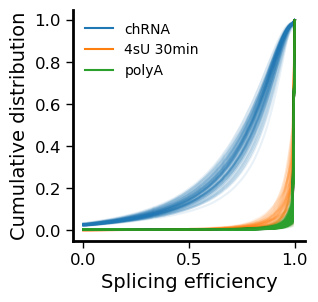

In [7]:
fig, ax = plt.subplots(figsize=(3, 3))

col_list = plt.cm.tab10(range(10))

for sample in chRNA_samples:
    ax.plot(np.linspace(0, 1, 100), plot_cumulative(chRNA_X[sample]), c=col_list[0], alpha=0.1)
    
for sample in ml30_samples:
    ax.plot(np.linspace(0, 1, 100), plot_cumulative(ml30_X[sample]), c=col_list[1], alpha=0.1)
    
# for sample in ml30_samples:
#     ax.plot(np.linspace(0, 1, 100), plot_cumulative(ml30_X[sample]), c=col_list[1], alpha=0.2)
    
for sample in polyA_samples:
    ax.plot(np.linspace(0, 1, 100), plot_cumulative(polyA_X[sample]), c=col_list[2], alpha=0.1)


xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.plot([-1], [0], c=col_list[0], label='chRNA')
ax.plot([-1], [-1], c=col_list[1], label='4sU 30min')
ax.plot([-1], [-1], c=col_list[2], label='polyA')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(length=5, labelsize=12, width=1)


ax.set_ylabel('cumulative distribution',size=14)
ax.set_xlabel('splicing efficiency',size=14)

ax.legend(frameon=False, fontsize=10)
    
ax.set_xlabel('Splicing efficiency')
ax.set_ylabel('Cumulative distribution')

ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('../code/manuscript_plots/supplementary_figures/Fig1.Supp.SplicingEfficiency.pdf', dpi=300, bbox_inches='tight')
plt.savefig('../code/manuscript_plots/supplementary_figures/Fig1.Supp.SplicingEfficiency.png', dpi=300, bbox_inches='tight')

In [40]:
ax.get_xlim()

(-0.05, 1.05)